In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/EcommerceDAnalysis1/data_rfm_pcapped_3dt1.pkl'
data_rfm_pcapped_3dt1 = pd.read_pickle(file_path, )

# Inspect the data
# Percentage based capped data 0.1% & 99%
print(data_rfm_pcapped_3dt1.head())
print(data_rfm_pcapped_3dt1.info())
print(data_rfm_pcapped_3dt1.shape)
print(data_rfm_pcapped_3dt1.describe().T)
print(data_rfm_pcapped_3dt1.nunique())
print(data_rfm_pcapped_3dt1.isnull().sum())
print(data_rfm_pcapped_3dt1.duplicated().sum())
print(data_rfm_pcapped_3dt1[~data_rfm_pcapped_3dt1.isnull().any(axis=1) & ~data_rfm_pcapped_3dt1.duplicated()])
print((data_rfm_pcapped_3dt1['Quantity'] < 0).sum(), (data_rfm_pcapped_3dt1['UnitPrice'] < 0).sum())
print(data_rfm_pcapped_3dt1.columns)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   

   DayOfWeek  ...  Month  Year  recency  frequency  monetary  recency_score  \
0          2  ...     12  2010 

In [3]:
# Exclude non-numeric columns for clustering (CustomerID, InvoiceNo, StockCode, Description, etc.)
clustering_data = data_rfm_pcapped_3dt1[['recency', 'frequency', 'monetary']]

# Standardize the numerical data for clustering
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the clustering data
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Convert the scaled data back to a DataFrame
clustering_data_scaled_df = pd.DataFrame(clustering_data_scaled, columns=clustering_data.columns)

# Display the first few rows of the scaled data and the info
print(clustering_data_scaled_df.head())
print(clustering_data_scaled_df.info())


    recency  frequency  monetary
0 -0.255927   0.340835 -0.120879
1 -0.255927   0.340835 -0.120879
2 -0.255927   0.340835 -0.120879
3 -0.255927   0.340835 -0.120879
4 -0.255927   0.340835 -0.120879
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522695 entries, 0 to 522694
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   recency    522695 non-null  float64
 1   frequency  522695 non-null  float64
 2   monetary   522695 non-null  float64
dtypes: float64(3)
memory usage: 12.0 MB
None


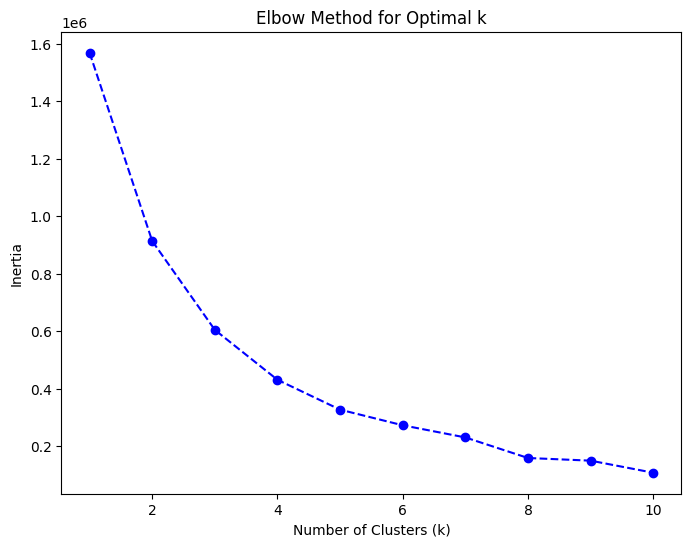

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a range of k values (from 1 to 10, or more if you want a broader search)
k_range = range(1, 11)

# Store the inertia for each k
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)  # Fit the model
    inertia.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the nearest cluster center

# Plot the inertia for each k value
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [5]:
# Set the optimal k (based on the elbow method)
k = 4  # Replace this with the k from the elbow plot

# Apply K-Means clustering with the chosen k
kmeans = KMeans(n_clusters=k, random_state=42)
data_rfm_pcapped_3dt1['KMeans_Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Display the clustering results
print(data_rfm_pcapped_3dt1[['CustomerID', 'KMeans_Cluster']].head())


   CustomerID  KMeans_Cluster
0       17850               0
1       17850               0
2       17850               0
3       17850               0
4       17850               0


In [6]:
print(data_rfm_pcapped_3dt1[['CustomerID', 'KMeans_Cluster']].info())
print(data_rfm_pcapped_3dt1[['CustomerID', 'KMeans_Cluster']].nunique())

<class 'pandas.core.frame.DataFrame'>
Index: 522695 entries, 0 to 522697
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   CustomerID      522695 non-null  int64
 1   KMeans_Cluster  522695 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 10.0 MB
None
CustomerID        5921
KMeans_Cluster       4
dtype: int64


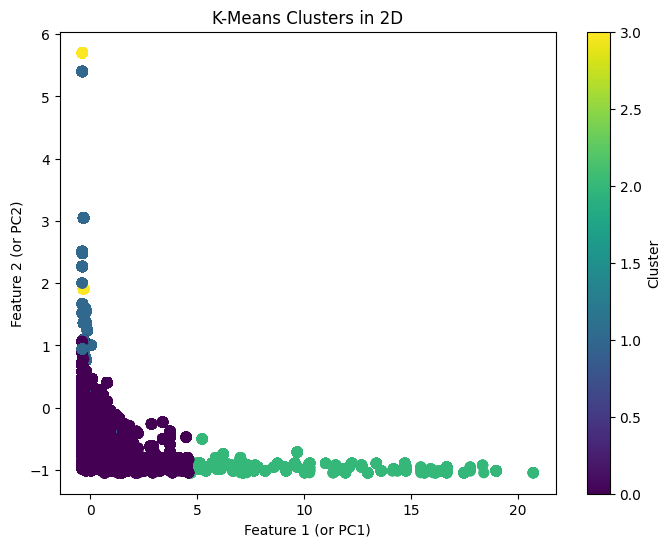

In [7]:
import matplotlib.pyplot as plt

# Assuming the data has been reduced to 2 dimensions, e.g., via PCA
# Create a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(clustering_data_scaled[:, 0], clustering_data_scaled[:, 1], c=data_rfm_pcapped_3dt1['KMeans_Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clusters in 2D')
plt.xlabel('Feature 1 (or PC1)')
plt.ylabel('Feature 2 (or PC2)')
plt.colorbar(label='Cluster')
plt.show()


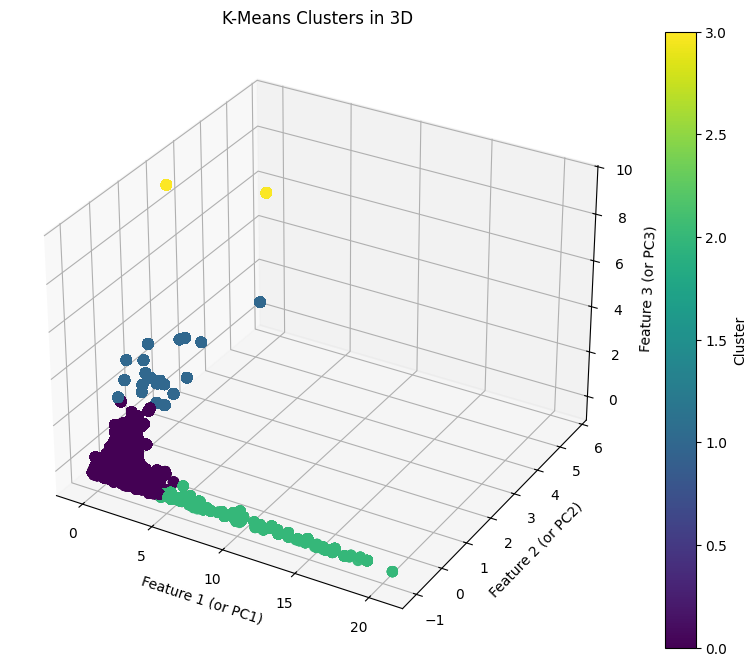

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have 3 features for 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
scatter = ax.scatter(clustering_data_scaled[:, 0], clustering_data_scaled[:, 1], clustering_data_scaled[:, 2],
                     c=data_rfm_pcapped_3dt1['KMeans_Cluster'], cmap='viridis', s=50)

ax.set_title('K-Means Clusters in 3D')
ax.set_xlabel('Feature 1 (or PC1)')
ax.set_ylabel('Feature 2 (or PC2)')
ax.set_zlabel('Feature 3 (or PC3)')
fig.colorbar(scatter, label='Cluster')

plt.show()


In [9]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(clustering_data_scaled, data_rfm_pcapped_3dt1['KMeans_Cluster'])
print("Davies-Bouldin Index:", db_index)


Davies-Bouldin Index: 0.6330954379326943


In [10]:
from sklearn.metrics import calinski_harabasz_score

# Calculate Calinski-Harabasz Index
calinski_score = calinski_harabasz_score(clustering_data_scaled, data_rfm_pcapped_3dt1['KMeans_Cluster'])
print(f"Calinski-Harabasz Index: {calinski_score}")


Calinski-Harabasz Index: 460361.2441337362


In [11]:
from sklearn.metrics import silhouette_score
from joblib import Parallel, delayed
import numpy as np
# Function to calculate the silhouette score for a chunk of the data
def calculate_silhouette_chunk(chunk, labels):
    return silhouette_score(chunk, labels)

# Split the data into smaller chunks (e.g., 10 parts)
n_chunks = 10
chunk_size = len(clustering_data_scaled) // n_chunks
chunks = [clustering_data_scaled[i*chunk_size:(i+1)*chunk_size] for i in range(n_chunks)]

# Calculate the silhouette score for each chunk in parallel
silhouette_scores = Parallel(n_jobs=-1)(delayed(calculate_silhouette_chunk)(chunk, data_rfm_pcapped_3dt1['KMeans_Cluster'][i*chunk_size:(i+1)*chunk_size]) for i, chunk in enumerate(chunks))

# Average the scores to get the final silhouette score
silhouette_avg = np.mean(silhouette_scores)
print("Silhouette score for the dataset (parallelized):", silhouette_avg)


Silhouette score for the dataset (parallelized): 0.76295544736738


In [12]:
import joblib

# Define the model path and file names
model_path = '/content/drive/MyDrive/ECommerce Analysis/'
model_name = 'KmeansSegmentsPurchaseBehaviour.pkl'
labels_csv_name = 'data_with_kmeans_clusters.csv'

# Save the KMeans model
joblib.dump(kmeans, model_path + model_name)
print(f"KMeans model saved successfully to {model_path + model_name}")

# Add the cluster labels to the dataframe
data_rfm_pcapped_3dt1['KMeans_Cluster'] = kmeans.labels_

# Save the dataframe with cluster labels to a CSV file
data_rfm_pcapped_3dt1.to_csv(model_path + labels_csv_name, index=False)
print(f"Cluster labels saved to CSV at {model_path + labels_csv_name}")


KMeans model saved successfully to /content/drive/MyDrive/ECommerce Analysis/KmeansSegmentsPurchaseBehaviour.pkl
Cluster labels saved to CSV at /content/drive/MyDrive/ECommerce Analysis/data_with_kmeans_clusters.csv
